In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

folds=('/kaggle/input/house-plant-species/house_plant_species')

labels=[]
filepaths=[]


for fold in os.listdir(folds):
    fullpath=os.path.join(folds,fold)
    for filename in os.listdir(fullpath):
        full_path=os.path.join(fullpath,filename)
        filepaths.append(full_path)
        labels.append(fold)
        
    

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
df=pd.DataFrame(data={"filepaths":filepaths, "labels":labels})
df   

,filepaths,labels
0,/kaggle/input/house-plant-species/house_plant_...,Orchid
1,/kaggle/input/house-plant-species/house_plant_...,Orchid
2,/kaggle/input/house-plant-species/house_plant_...,Orchid
3,/kaggle/input/house-plant-species/house_plant_...,Orchid
4,/kaggle/input/house-plant-species/house_plant_...,Orchid
...,...,...
14785,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)
14786,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)
14787,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)
14788,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)


In [8]:
df['labels'].value_counts()

labels
Monstera Deliciosa (Monstera deliciosa)       547
Dumb Cane (Dieffenbachia spp.)                541
Chinese evergreen (Aglaonema)                 514
Lilium (Hemerocallis)                         480
Anthurium (Anthurium andraeanum)              455
ZZ Plant (Zamioculcas zamiifolia)             438
Daffodils (Narcissus spp.)                    421
Lily of the valley (Convallaria majalis)      416
Prayer Plant (Maranta leuconeura)             400
Snake plant (Sanseviera)                      396
Peace lily                                    385
Chinese Money Plant (Pilea peperomioides)     382
Money Tree (Pachira aquatica)                 359
Jade plant (Crassula ovata)                   353
Ctenanthe                                     347
Tulip                                         341
Polka Dot Plant (Hypoestes phyllostachya)     341
Tradescantia                                  341
African Violet (Saintpaulia ionantha)         337
Elephant Ear (Alocasia spp.)               

In [9]:
train_df,df_to_split=train_test_split(df,test_size=0.4,random_state=42,stratify=df['labels'])


In [10]:
train_df

,filepaths,labels
3393,/kaggle/input/house-plant-species/house_plant_...,Chinese evergreen (Aglaonema)
3050,/kaggle/input/house-plant-species/house_plant_...,Sago Palm (Cycas revoluta)
1770,/kaggle/input/house-plant-species/house_plant_...,Snake plant (Sanseviera)
1320,/kaggle/input/house-plant-species/house_plant_...,Areca Palm (Dypsis lutescens)
10067,/kaggle/input/house-plant-species/house_plant_...,ZZ Plant (Zamioculcas zamiifolia)
...,...,...
4882,/kaggle/input/house-plant-species/house_plant_...,Parlor Palm (Chamaedorea elegans)
14587,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)
13859,/kaggle/input/house-plant-species/house_plant_...,Tradescantia
8533,/kaggle/input/house-plant-species/house_plant_...,Lilium (Hemerocallis)


In [11]:
df_valid,df_test=train_test_split(df_to_split,test_size=0.5,random_state=42,stratify=df_to_split['labels'])
df_valid

,filepaths,labels
11532,/kaggle/input/house-plant-species/house_plant_...,Rubber Plant (Ficus elastica)
3127,/kaggle/input/house-plant-species/house_plant_...,Cast Iron Plant (Aspidistra elatior)
68,/kaggle/input/house-plant-species/house_plant_...,Orchid
7779,/kaggle/input/house-plant-species/house_plant_...,Ponytail Palm (Beaucarnea recurvata)
12690,/kaggle/input/house-plant-species/house_plant_...,Tulip
...,...,...
5587,/kaggle/input/house-plant-species/house_plant_...,Peace lily
14229,/kaggle/input/house-plant-species/house_plant_...,African Violet (Saintpaulia ionantha)
408,/kaggle/input/house-plant-species/house_plant_...,Chrysanthemum
3654,/kaggle/input/house-plant-species/house_plant_...,Chinese evergreen (Aglaonema)


In [12]:
df_test

,filepaths,labels
14184,/kaggle/input/house-plant-species/house_plant_...,African Violet (Saintpaulia ionantha)
13962,/kaggle/input/house-plant-species/house_plant_...,Tradescantia
13375,/kaggle/input/house-plant-species/house_plant_...,Anthurium (Anthurium andraeanum)
11048,/kaggle/input/house-plant-species/house_plant_...,Polka Dot Plant (Hypoestes phyllostachya)
352,/kaggle/input/house-plant-species/house_plant_...,Chrysanthemum
...,...,...
2696,/kaggle/input/house-plant-species/house_plant_...,Hyacinth (Hyacinthus orientalis)
4241,/kaggle/input/house-plant-species/house_plant_...,Daffodils (Narcissus spp.)
2435,/kaggle/input/house-plant-species/house_plant_...,Bird of Paradise (Strelitzia reginae)
14332,/kaggle/input/house-plant-species/house_plant_...,Pothos (Ivy arum)


In [13]:

df_valid['labels'].value_counts()

labels
Monstera Deliciosa (Monstera deliciosa)       110
Dumb Cane (Dieffenbachia spp.)                108
Chinese evergreen (Aglaonema)                 103
Lilium (Hemerocallis)                          96
Anthurium (Anthurium andraeanum)               91
ZZ Plant (Zamioculcas zamiifolia)              87
Daffodils (Narcissus spp.)                     84
Lily of the valley (Convallaria majalis)       83
Prayer Plant (Maranta leuconeura)              80
Snake plant (Sanseviera)                       79
Peace lily                                     77
Chinese Money Plant (Pilea peperomioides)      76
Money Tree (Pachira aquatica)                  72
Jade plant (Crassula ovata)                    71
Ctenanthe                                      70
Tradescantia                                   69
Tulip                                          68
Polka Dot Plant (Hypoestes phyllostachya)      68
African Violet (Saintpaulia ionantha)          68
Calathea                                   

In [14]:
df_test['labels'].value_counts()

labels
Monstera Deliciosa (Monstera deliciosa)       109
Dumb Cane (Dieffenbachia spp.)                108
Chinese evergreen (Aglaonema)                 103
Lilium (Hemerocallis)                          96
Anthurium (Anthurium andraeanum)               91
ZZ Plant (Zamioculcas zamiifolia)              88
Daffodils (Narcissus spp.)                     84
Lily of the valley (Convallaria majalis)       83
Prayer Plant (Maranta leuconeura)              80
Snake plant (Sanseviera)                       79
Chinese Money Plant (Pilea peperomioides)      77
Peace lily                                     77
Money Tree (Pachira aquatica)                  72
Jade plant (Crassula ovata)                    70
Ctenanthe                                      69
Tradescantia                                   68
Tulip                                          68
Polka Dot Plant (Hypoestes phyllostachya)      68
Elephant Ear (Alocasia spp.)                   67
African Violet (Saintpaulia ionantha)      

In [15]:
gen=ImageDataGenerator()

train_gen=gen.flow_from_dataframe(train_df,x_col='filepaths',y_col='labels',target_size=(224,224),
                                 class_mode='categorical',color_mode='rgb',batch_size=16
                                 ,)
valid_gen=gen.flow_from_dataframe(df_valid,x_col='filepaths',y_col='labels',target_size=(224,224),
                                 class_mode='categorical',color_mode='rgb',batch_size=16
                    )
test_gen=gen.flow_from_dataframe(df_test,x_col='filepaths',y_col='labels',target_size=(224,224),
                                class_mode='categorical',color_mode='rgb',batch_size=16
                                )

Found 8767 validated image filenames belonging to 47 classes.
Found 2937 validated image filenames belonging to 47 classes.
Found 2916 validated image filenames belonging to 47 classes.


In [16]:
early_stop=EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

model=Sequential([
    Input((224,224,3)),
    Conv2D(224,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(64,activation='relu'),
    Dropout(0.3),

    Dense(47,activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 224)  │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 224)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │       258,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 373248)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    47,775,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 47)             │         3,055 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,051,631 (183.30 MB)

 Trainable params: 48,051,631 (183.30 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history=model.fit(train_gen,epochs=10,validation_data=valid_gen,callbacks=[early_stop])

Epoch 1/10


I0000 00:00:1769629564.626299     129 service.cc:152] XLA service 0x7dfe24004b20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1769629564.626340     129 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1769629564.626344     129 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1769629565.186444     129 cuda_dnn.cc:529] Loaded cuDNN version 91002


  1/548 ━━━━━━━━━━━━━━━━━━━━ 2:06:54 14s/step - accuracy: 0.0000e+00 - loss: 70.0653

I0000 00:00:1769629576.051198     129 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


548/548 ━━━━━━━━━━━━━━━━━━━━ 426s 752ms/step - accuracy: 0.0341 - loss: 24.3995 - val_accuracy: 0.0364 - val_loss: 3.8467
Epoch 2/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 270s 492ms/step - accuracy: 0.0385 - loss: 3.8456 - val_accuracy: 0.0368 - val_loss: 3.8432
Epoch 3/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 267s 486ms/step - accuracy: 0.0358 - loss: 3.8447 - val_accuracy: 0.0368 - val_loss: 3.8401
Epoch 4/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 269s 491ms/step - accuracy: 0.0359 - loss: 3.8393 - val_accuracy: 0.0368 - val_loss: 3.8369
Epoch 5/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 271s 494ms/step - accuracy: 0.0353 - loss: 3.8366 - val_accuracy: 0.0368 - val_loss: 3.8339
Epoch 6/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 272s 497ms/step - accuracy: 0.0363 - loss: 3.8330 - val_accuracy: 0.0368 - val_loss: 3.8311
Epoch 7/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 266s 486ms/step - accuracy: 0.0385 - loss: 3.8294 - val_accuracy: 0.0368 - val_loss: 3.8283
Epoch 8/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 266s 486ms/step - accuracy: 0.0411 - loss: 3.8

In [18]:
model.evaluate(train_gen)

548/548 ━━━━━━━━━━━━━━━━━━━━ 199s 363ms/step - accuracy: 0.0383 - loss: 3.8191


[3.820582866668701, 0.0368427038192749]

In [19]:
model.evaluate(valid_gen)

184/184 ━━━━━━━━━━━━━━━━━━━━ 67s 366ms/step - accuracy: 0.0367 - loss: 3.8207


[3.820985794067383, 0.036772217601537704]

In [20]:
model.evaluate(test_gen)

183/183 ━━━━━━━━━━━━━━━━━━━━ 98s 533ms/step - accuracy: 0.0301 - loss: 3.8216


[3.8207144737243652, 0.03703703731298447]

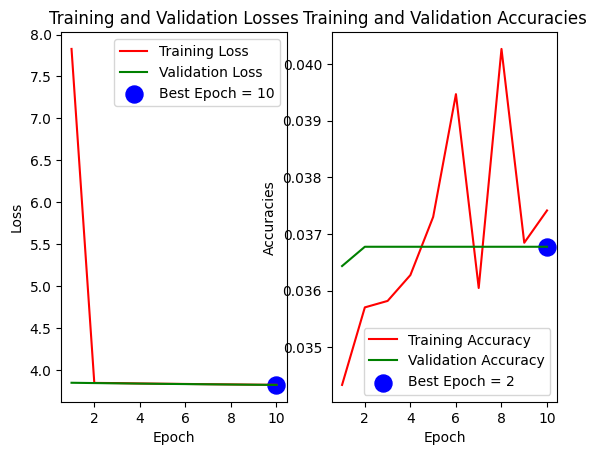

In [21]:
tr_acc=history.history['accuracy']
tr_loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']
index_loss=np.argmin(val_loss)
val_lowest=val_loss[index_loss]
index_acc=np.argmax(val_acc)
acc_highest=val_acc[index_acc]

Epochs=[i+1 for i in range(len(tr_acc))]
loss_label=f"Best Epoch = {str(index_loss+1)}"
acc_label=f"Best Epoch = {str(index_acc+1)}"

#plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(Epochs,tr_loss,'r',label='Training Loss')
plt.plot(Epochs,val_loss,'g',label='Validation Loss')
plt.scatter(index_loss+1,val_lowest,s=150,c='blue',label=loss_label)
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs,tr_acc,'r',label='Training Accuracy')
plt.plot(Epochs,val_acc,'g',label='Validation Accuracy')
plt.scatter(index_loss+1,acc_highest,s=150,c='blue',label=acc_label)
plt.title("Training and Validation Accuracies")
plt.xlabel("Epoch")
plt.ylabel('Accuracies')
plt.legend()
plt.show()



In [25]:
base_model=tf.keras.applications.EfficientNetB4(
    include_top=False,
    input_shape=(224,224,3),
    pooling=max,
)


model=Sequential([
    base_model,
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(47,activation='relu')
])
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)     │ (None, 7, 7, 1792)     │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 87808)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    11,239,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 47)             │         3,055 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,924,686 (110.34 MB)

 Trainable params: 28,799,479 (109.86 MB)

 Non-trainable params: 125,207 (489.09 KB)

In [26]:
history=model.fit(train_gen,epochs=10,validation_data=valid_gen,callbacks=[early_stop])

Epoch 1/10


2026-01-28 20:42:18.924824: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 20:42:19.058533: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 20:42:19.299637: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 20:42:19.438863: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 20:42:19.692537: E external/local_xla/xla/stream_

499/548 ━━━━━━━━━━━━━━━━━━━━ 18s 368ms/step - accuracy: 0.0754 - loss: 7.7435

2026-01-28 20:46:39.541457: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 20:46:39.675452: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 20:46:39.909366: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 20:46:40.048394: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 20:46:40.299782: E external/local_xla/xla/stream_

548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.0766 - loss: 7.6589

2026-01-28 20:49:12.791674: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 20:49:12.925422: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 20:49:13.147750: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 20:49:13.284302: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 20:49:13.518660: E external/local_xla/xla/stream_

548/548 ━━━━━━━━━━━━━━━━━━━━ 513s 675ms/step - accuracy: 0.0767 - loss: 7.6573 - val_accuracy: 0.1093 - val_loss: 5.5184
Epoch 2/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 270s 492ms/step - accuracy: 0.1337 - loss: 5.1649 - val_accuracy: 0.1376 - val_loss: 4.6279
Epoch 3/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 268s 489ms/step - accuracy: 0.1770 - loss: 4.3972 - val_accuracy: 0.1049 - val_loss: 4.3617
Epoch 4/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 271s 494ms/step - accuracy: 0.1449 - loss: 4.0649 - val_accuracy: 0.1563 - val_loss: 3.9741
Epoch 5/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 268s 488ms/step - accuracy: 0.2183 - loss: 3.6042 - val_accuracy: 0.2404 - val_loss: 3.4899
Epoch 6/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 267s 488ms/step - accuracy: 0.2986 - loss: 3.2924 - val_accuracy: 0.3313 - val_loss: 3.2518
Epoch 7/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 272s 495ms/step - accuracy: 0.4001 - loss: 3.0316 - val_accuracy: 0.1345 - val_loss: 5.2121
Epoch 8/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 273s 499ms/step - accuracy: 0.2136 - loss: 4.20

In [27]:
model.evaluate(test_gen)

182/183 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.3196 - loss: 3.1805

2026-01-28 21:23:05.177667: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 21:23:05.311171: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 21:23:05.534522: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 21:23:05.669601: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 21:23:05.900826: E external/local_xla/xla/stream_

183/183 ━━━━━━━━━━━━━━━━━━━━ 84s 459ms/step - accuracy: 0.3197 - loss: 3.1811


[3.2360002994537354, 0.3230452537536621]

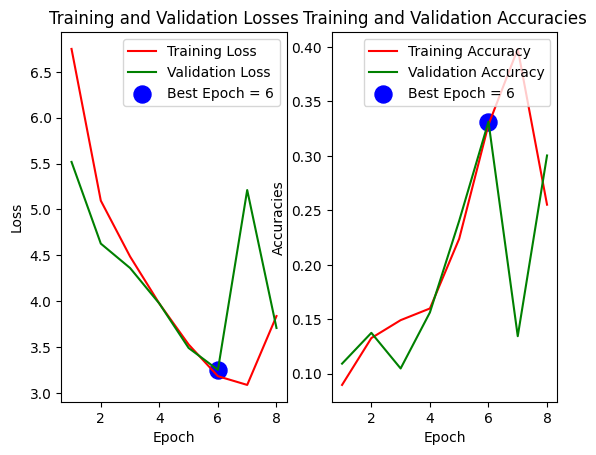

In [28]:
tr_acc=history.history['accuracy']
tr_loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']
index_loss=np.argmin(val_loss)
val_lowest=val_loss[index_loss]
index_acc=np.argmax(val_acc)
acc_highest=val_acc[index_acc]

Epochs=[i+1 for i in range(len(tr_acc))]
loss_label=f"Best Epoch = {str(index_loss+1)}"
acc_label=f"Best Epoch = {str(index_acc+1)}"

#plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(Epochs,tr_loss,'r',label='Training Loss')
plt.plot(Epochs,val_loss,'g',label='Validation Loss')
plt.scatter(index_loss+1,val_lowest,s=150,c='blue',label=loss_label)
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs,tr_acc,'r',label='Training Accuracy')
plt.plot(Epochs,val_acc,'g',label='Validation Accuracy')
plt.scatter(index_loss+1,acc_highest,s=150,c='blue',label=acc_label)
plt.title("Training and Validation Accuracies")
plt.xlabel("Epoch")
plt.ylabel('Accuracies')
plt.legend()
plt.show()



In [29]:
model.save("plant_classifier.h5")

In [30]:
model = tf.keras.models.load_model("plant_classifier.h5")

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()

# Save TFLite model
with open("plant_classifier.tflite", "wb") as f:
    f.write(tflite_model)

print("TFLite model saved successfully!")


INFO:tensorflow:Assets written to: /tmp/tmpeh5u0ot7/assets


INFO:tensorflow:Assets written to: /tmp/tmpeh5u0ot7/assets


Saved artifact at '/tmp/tmpeh5u0ot7'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_6')
Output Type:
  TensorSpec(shape=(None, 47), dtype=tf.float32, name=None)
Captures:
  138526589930384: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  138526589936528: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  138526589936720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138526589935952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138526589931344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138526589937488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138526589938064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138526589935568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138526589935184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138526589937872: TensorSpec(shape=(), dtype=tf.resource, name=No

W0000 00:00:1769635736.279843      55 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1769635736.279898      55 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1769635736.700650      55 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled


TFLite model saved successfully!
